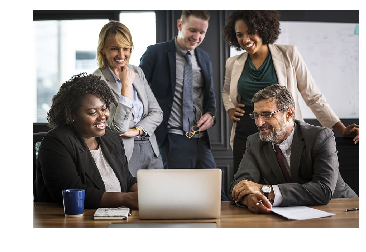

{'categories': [{'name': 'people_group', 'score': 0.7265625, 'detail': {'celebrities': [{'name': 'Ukinebo Dare', 'confidence': 0.788573682308197, 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}]}}], 'description': {'tags': ['person', 'indoor', 'people', 'group', 'conference room', 'crowd'], 'captions': [{'text': 'Ukinebo Dare et al. having a discussion', 'confidence': 0.5275335907936096}]}, 'faces': [{'age': 56, 'gender': 'Male', 'faceRectangle': {'left': 598, 'top': 271, 'width': 83, 'height': 83}}, {'age': 34, 'gender': 'Female', 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}, {'age': 26, 'gender': 'Female', 'faceRectangle': {'left': 560, 'top': 48, 'width': 71, 'height': 71}}, {'age': 33, 'gender': 'Female', 'faceRectangle': {'left': 208, 'top': 90, 'width': 70, 'height': 70}}, {'age': 34, 'gender': 'Male', 'faceRectangle': {'left': 427, 'top': 45, 'width': 57, 'height': 57}}], 'objects': [{'rectangle': {'x': 81, 'y': 496, 'w': 72, 'h':

In [43]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

subscription_key = "acaf8af0862b4373af14a3d3e8c5a517"
analyze_url = "https://comp-vi-in.cognitiveservices.azure.com//vision/v3.1/analyze"
image_url = "https://c0.wallpaperflare.com/preview/545/533/193/analyzing-people-brainstorming-business-business-people.jpg"
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Faces,Objects'}
data = {'url': image_url}

try:
    response = requests.post(analyze_url, headers=headers,params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

# Display the image
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()
print(analysis)

In [52]:
analysis['faces']

[{'age': 56,
  'gender': 'Male',
  'faceRectangle': {'left': 598, 'top': 271, 'width': 83, 'height': 83}},
 {'age': 34,
  'gender': 'Female',
  'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}},
 {'age': 26,
  'gender': 'Female',
  'faceRectangle': {'left': 560, 'top': 48, 'width': 71, 'height': 71}},
 {'age': 33,
  'gender': 'Female',
  'faceRectangle': {'left': 208, 'top': 90, 'width': 70, 'height': 70}},
 {'age': 34,
  'gender': 'Male',
  'faceRectangle': {'left': 427, 'top': 45, 'width': 57, 'height': 57}}]

In [53]:
faces = []
for rec in analysis['faces']:
    k = []
    k.append(rec['faceRectangle']['left'])
    k.append(rec['faceRectangle']['top'])
    k.append(rec['faceRectangle']['width'])
    k.append(rec['faceRectangle']['height'])
    faces.append(k)
faces

[[598, 271, 83, 83],
 [150, 262, 74, 74],
 [560, 48, 71, 71],
 [208, 90, 70, 70],
 [427, 45, 57, 57]]

In [48]:
analysis['objects']

[{'rectangle': {'x': 81, 'y': 496, 'w': 72, 'h': 87},
  'object': 'cup',
  'confidence': 0.632,
  'parent': {'object': 'Container', 'confidence': 0.634}},
 {'rectangle': {'x': 158, 'y': 16, 'w': 204, 'h': 467},
  'object': 'person',
  'confidence': 0.867},
 {'rectangle': {'x': 287, 'y': 439, 'w': 247, 'h': 143},
  'object': 'Laptop',
  'confidence': 0.805,
  'parent': {'object': 'computer', 'confidence': 0.806}},
 {'rectangle': {'x': 518, 'y': 2, 'w': 381, 'h': 411},
  'object': 'person',
  'confidence': 0.813},
 {'rectangle': {'x': 299, 'y': 10, 'w': 221, 'h': 462},
  'object': 'person',
  'confidence': 0.909},
 {'rectangle': {'x': 12, 'y': 172, 'w': 301, 'h': 397},
  'object': 'person',
  'confidence': 0.899},
 {'rectangle': {'x': 543, 'y': 205, 'w': 349, 'h': 349},
  'object': 'person',
  'confidence': 0.918}]

In [57]:
objects = []
for rec in analysis['objects']:
    k = []
    k.append(rec['rectangle']['x'])
    k.append(rec['rectangle']['y'])
    k.append(rec['rectangle']['w'])
    k.append(rec['rectangle']['h'])
    objects.append(k)
objects


[[81, 496, 72, 87],
 [158, 16, 204, 467],
 [287, 439, 247, 143],
 [518, 2, 381, 411],
 [299, 10, 221, 462],
 [12, 172, 301, 397],
 [543, 205, 349, 349]]

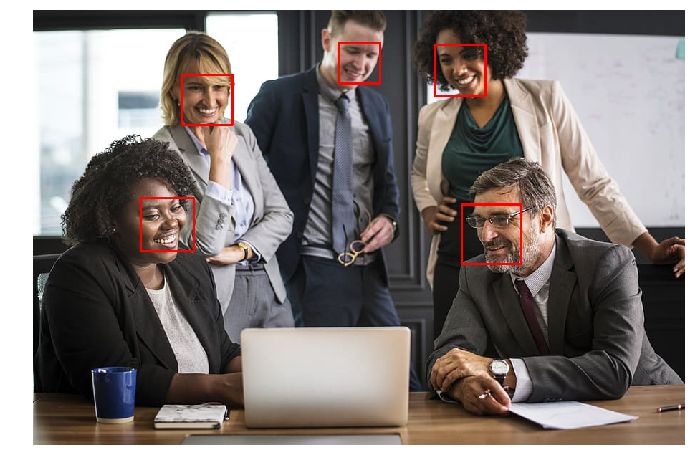

In [59]:
import numpy as np
import cv2


def generate_bounding_box(image_url, boundRect):
    image = Image.open(BytesIO(requests.get(image_url).content))
    np_img = np.asarray(image)
    drawing = np_img
    for i in range(len(boundRect)):
        color = (255,0,0)
        cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)


    #showing image
    plt.figure(figsize=(14,8))
    plt.imshow(drawing)
    plt.axis("off")
    plt.show()

    
image_url = "https://c0.wallpaperflare.com/preview/545/533/193/analyzing-people-brainstorming-business-business-people.jpg"
generate_bounding_box(image_url,faces)

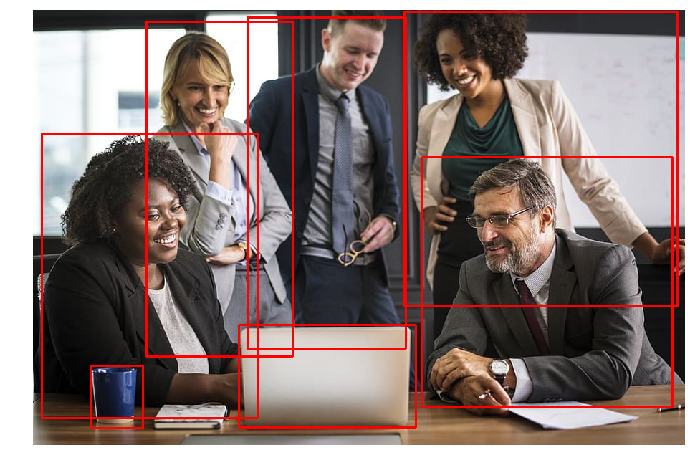

In [58]:
image_url = "https://c0.wallpaperflare.com/preview/545/533/193/analyzing-people-brainstorming-business-business-people.jpg"
generate_bounding_box(image_url,objects)